To analyse the medical status of patients using machine learning.

In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('OHSU_phenotypic.csv')
df.head()


,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,...,Performance IQ,Full2 IQ,Full4 IQ,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,1084283,6,1,11.00,1,1,NaN,3,NaN,69,...,NaN,NaN,110,2,0,1,1,NaN,1,NaN
1,1084884,6,0,9.42,1,0,enuresis,3,NaN,48,...,NaN,NaN,106,1,1,1,1,NaN,1,NaN
2,1108916,6,1,8.50,1,1,ODD,3,NaN,70,...,NaN,NaN,116,1,1,1,1,NaN,1,NaN
3,1206380,6,1,9.17,1,3,NaN,3,NaN,63,...,NaN,NaN,90,1,1,1,1,NaN,1,NaN
4,1340333,6,0,7.42,1,1,NaN,3,NaN,80,...,NaN,NaN,98,2,1,1,1,NaN,1,NaN


In [5]:
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ScanDir ID       79 non-null     int64  
 1   Site             79 non-null     int64  
 2   Gender           79 non-null     int64  
 3   Age              79 non-null     float64
 4   Handedness       79 non-null     int64  
 5   DX               79 non-null     int64  
 6   Secondary Dx     11 non-null     object 
 7   ADHD Measure     79 non-null     int64  
 8   ADHD Index       0 non-null      float64
 9   Inattentive      79 non-null     int64  
 10  Hyper/Impulsive  79 non-null     int64  
 11  IQ Measure       79 non-null     int64  
 12  Verbal IQ        0 non-null      float64
 13  Performance IQ   0 non-null      float64
 14  Full2 IQ         0 non-null      float64
 15  Full4 IQ         79 non-null     int64  
 16  Med Status       79 non-null     int64  
 17  QC_Rest_1        7

In [7]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)


Categorical columns : ['Secondary Dx ']
Numerical columns : ['ScanDir ID', 'Site', 'Gender', 'Age', 'Handedness', 'DX', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ', 'Performance IQ', 'Full2 IQ', 'Full4 IQ', 'Med Status', 'QC_Rest_1', 'QC_Rest_2', 'QC_Rest_3', 'QC_Rest_4', 'QC_Anatomical_1', 'QC_Anatomical_2']


In [8]:
df[cat_col].nunique()

,0
Secondary Dx,4


In [10]:
df['ADHD Index'].unique()[:50]

array([nan])

In [12]:
df1 = df.drop(columns=['Performance IQ','Full2 IQ'])
df1.shape

(79, 21)

In [13]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

,0
ScanDir ID,0.00
Site,0.00
Gender,0.00
Age,0.00
Handedness,0.00
DX,0.00
Secondary Dx,86.08
ADHD Measure,0.00
ADHD Index,100.00
Inattentive,0.00


In [16]:
df2 = df1.drop(columns='Handedness')
df2.dropna(subset=['Site'], axis=0, inplace=True)
df2.shape


(79, 20)

In [17]:
X = df2[['Full4 IQ','Med Status']]
Y = df
Y = Y['Age']
print (X.shape)
print (Y.shape)

(79, 2)
(79,)


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [19]:
def importdata():
    balance_data = pd.read_csv('OHSU_phenotypic.csv')


    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ", balance_data.head())

    return balance_data

In [76]:
def splitdataset(data):
    X = data.values[:, 1:]
    Y = data.values[:, 0]

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)  # Split the dataset here

    if isinstance(X_train, np.ndarray):
        # Get the actual column names from the original DataFrame
        actual_feature_names = data.columns[:-1]  # Exclude the target variable column

    return X, Y, X_train, X_test, y_train, y_test

In [180]:
def train_using_gini(X_train, X_test, y_train):
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
    if isinstance(X_test, np.ndarray):
        X_test = pd.DataFrame(X_test)

    # Handle non-numeric columns by one-hot encoding on the combined dataset
    combined_data = pd.concat([X_train, X_test])
    combined_data = pd.get_dummies(combined_data)

    # Split the combined data back into train and test
    X_train = combined_data.iloc[:X_train.shape[0], :]
    X_test = combined_data.iloc[X_train.shape[0]:, :]

    # Identify numeric columns after one-hot encoding
    numeric_cols_train = X_train.select_dtypes(include=['number']).columns
    X_train[numeric_cols_train] = X_train[numeric_cols_train].replace(',', '', regex=True).astype(float)

    numeric_cols_test = X_test.select_dtypes(include=['number']).columns
    X_test[numeric_cols_test] = X_test[numeric_cols_test].replace(',', '', regex=True).astype(float)

    from sklearn.impute import SimpleImputer
    # Use 'constant' strategy to fill missing values with a placeholder like 0

    imputer = SimpleImputer(strategy='constant', fill_value=0)
    # Convert boolean columns to integers before imputation
    for col in X_train.select_dtypes(include=['bool']):
        X_train[col] = X_train[col].astype(int)
    for col in X_test.select_dtypes(include=['bool']):
        X_test[col] = X_test[col].astype(int)

    X_train_np = imputer.fit_transform(X_train) # NumPy array for model fitting
    X_test = imputer.transform(X_test)

    # Check if y_train needs to be converted to integer labels
    if y_train.dtype not in [int, np.int32, np.int64]:
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)  # Convert to integer labels if needed

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train_np, y_train)
    return X_train, clf_gini # Return the DataFrame for feature names

In [181]:
def train_using_entropy(X_train, X_test, y_train):

    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
    if isinstance(X_test, np.ndarray):
        X_test = pd.DataFrame(X_test)

    # Handle non-numeric columns by one-hot encoding on the combined dataset
    combined_data = pd.concat([X_train, X_test])
    combined_data = pd.get_dummies(combined_data)
    # Split the combined data back into train and test
    X_train = combined_data.iloc[:X_train.shape[0], :]
    X_test = combined_data.iloc[X_train.shape[0]:, :]

    # Identify numeric columns after one-hot encoding
    numeric_cols_train = X_train.select_dtypes(include=['number']).columns
    X_train[numeric_cols_train] = X_train[numeric_cols_train].replace(',', '', regex=True).astype(float)

    numeric_cols_test = X_test.select_dtypes(include=['number']).columns
    X_test[numeric_cols_test] = X_test[numeric_cols_test].replace(',', '', regex=True).astype(float)

    from sklearn.impute import SimpleImputer
    # Use 'constant' strategy to fill missing values with 0
    imputer = SimpleImputer(strategy='constant', fill_value=0)

    # Convert boolean columns to integers before imputation
    for col in X_train.select_dtypes(include=['bool']):
        X_train[col] = X_train[col].astype(int)
    for col in X_test.select_dtypes(include=['bool']):
        X_test[col] = X_test[col].astype(int)
    if y_train.dtype not in [int, np.int32, np.int64]:
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)  # Convert to integer labels if needed
    X_train_np = imputer.fit_transform(X_train) # NumPy array for model fitting
    X_test = imputer.transform(X_test)

    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    clf_entropy.fit(X_train_np, y_train)
    return X_train, clf_entropy

In [182]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))


In [185]:
from sklearn import tree
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(30, 10))
    if class_names is None:
        class_names = clf_object.classes_
    # Convert class_names to strings if they are not already
    class_names = [str(name) for name in class_names]  # Convert to list of strings
    # Use feature_names derived from the training data after one-hot encoding
    tree.plot_tree(clf_object, filled=True, feature_names=feature_names,
                   class_names=class_names, rounded=True)
    plt.show()

Dataset Length:  79
Dataset Shape:  (79, 23)
Dataset:     ScanDir ID  Site  Gender    Age  Handedness  DX Secondary Dx   \
0     1084283     6       1  11.00           1   1           NaN   
1     1084884     6       0   9.42           1   0      enuresis   
2     1108916     6       1   8.50           1   1           ODD   
3     1206380     6       1   9.17           1   3           NaN   
4     1340333     6       0   7.42           1   1           NaN   

   ADHD Measure  ADHD Index  Inattentive  ...  Performance IQ  Full2 IQ  \
0             3         NaN           69  ...             NaN       NaN   
1             3         NaN           48  ...             NaN       NaN   
2             3         NaN           70  ...             NaN       NaN   
3             3         NaN           63  ...             NaN       NaN   
4             3         NaN           80  ...             NaN       NaN   

   Full4 IQ  Med Status  QC_Rest_1  QC_Rest_2  QC_Rest_3  QC_Rest_4  \
0       110   

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype(int)
<ipython-input-181-828c97ebf1a0>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype(int)
<ipython-input-181-828c97ebf1a0>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype(int)
<ipython-input-181-828c97ebf1a0>:2

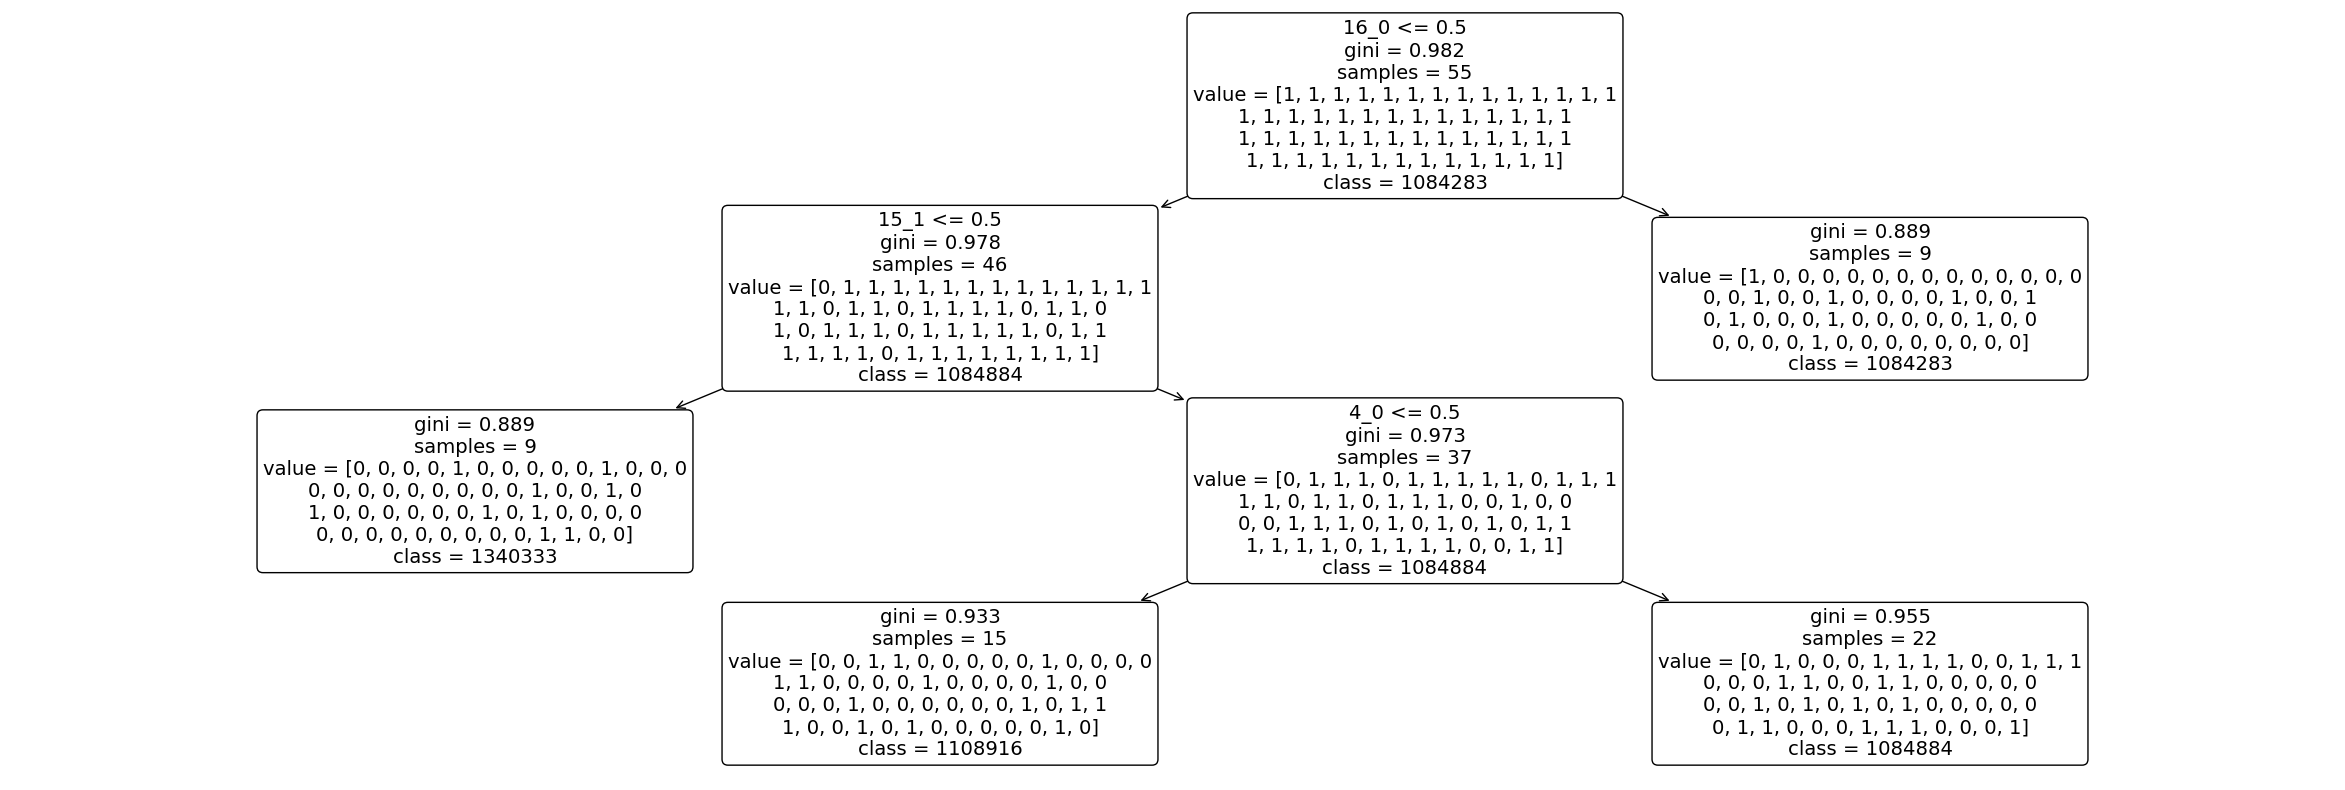

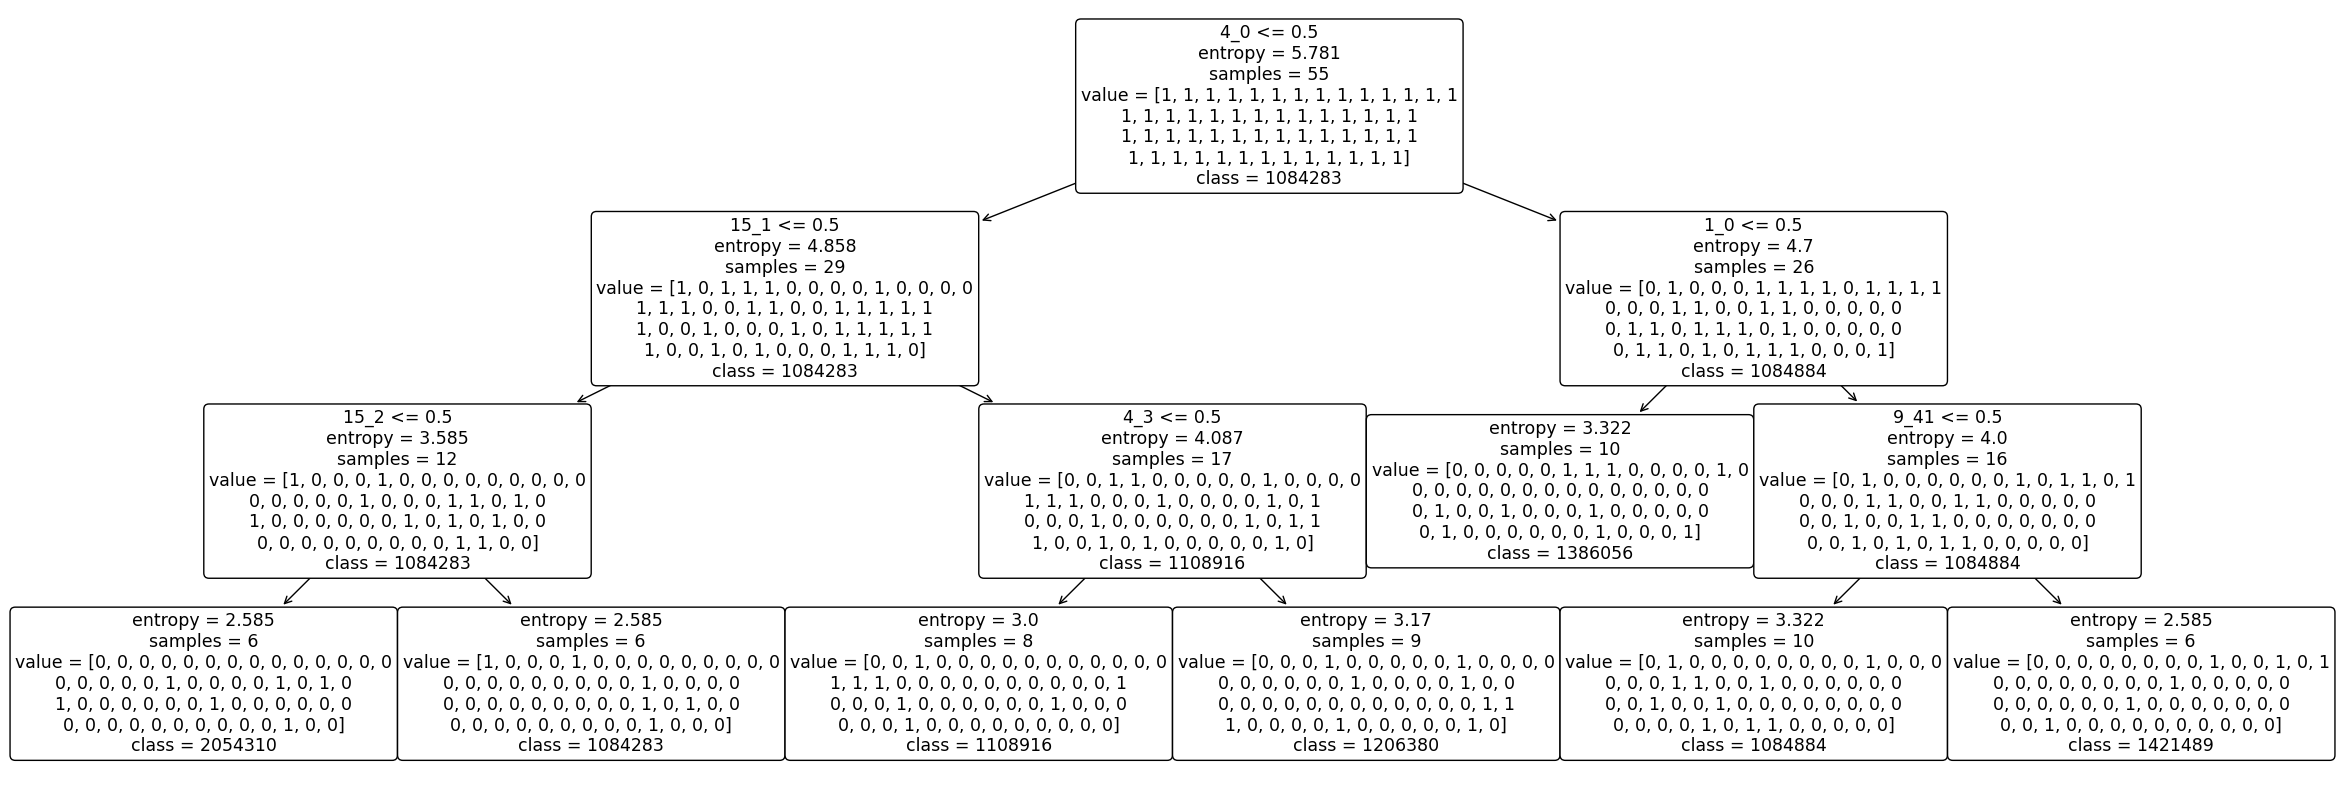

In [186]:
if __name__ == "__main__":
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)

    # Modify the training functions to return the processed X_train along with the classifier
    X_train_gini, clf_gini = train_using_gini(X_train, X_test, y_train)
    X_train_entropy, clf_entropy = train_using_entropy(X_train, X_test, y_train)

    # Get feature names from the training data AFTER one-hot encoding
    actual_feature_names_gini = X_train_gini.columns
    actual_feature_names_entropy = X_train_entropy.columns
    class_names = pd.Series(Y).unique()

    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, actual_feature_names_gini, class_names)
    plot_decision_tree(clf_entropy, actual_feature_names_entropy, class_names)